In [1]:

import os
import numpy as np
import pandas as pd

# Directories for image CSV files and the output file
image_dir = r'C:\Users\91897\Desktop\CP302\Speckle Images\C_1\Set2\Center'
output_csv = os.path.join(image_dir, 'mean_intensity_values.csv')

# Number of files
num_files = 90
mean_intensity_values = []

# Loop through each CSV file corresponding to an image
for i in range(1, num_files + 1):
    # Construct the file name
    file_name = f'T{i}_0008.ascii.csv'
    file_path = os.path.join(image_dir, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file
        data = pd.read_csv(file_path, header=None).values
        
        # Define a 10x10 pixel Region of Interest (ROI) - you can adjust the region if needed
        roi = data[:10, :10]  # This takes the top-left 10x10 region
        
        # Calculate the mean intensity of the ROI
        mean_intensity = np.mean(roi)
        
        # Append the result to the list
        mean_intensity_values.append([file_name, mean_intensity])
    else:
        print(f'File not found: {file_name}')

# Create a DataFrame with the results
mean_intensity_df = pd.DataFrame(mean_intensity_values, columns=['File', 'Mean Intensity'])

# Save the DataFrame as a CSV file
mean_intensity_df.to_csv(output_csv, index=False)

print(f'Mean intensity values saved to {output_csv}')


Mean intensity values saved to C:\Users\91897\Desktop\CP302\Speckle Images\C_1\Set2\Center\mean_intensity_values.csv


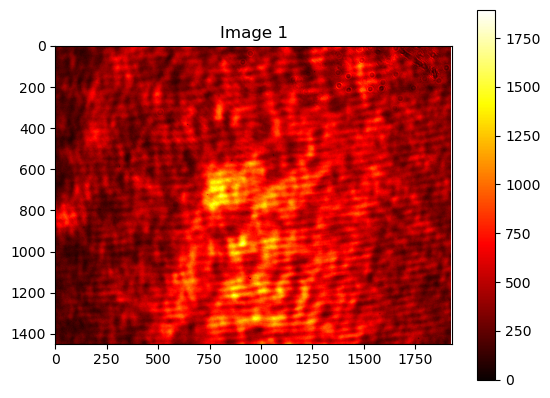

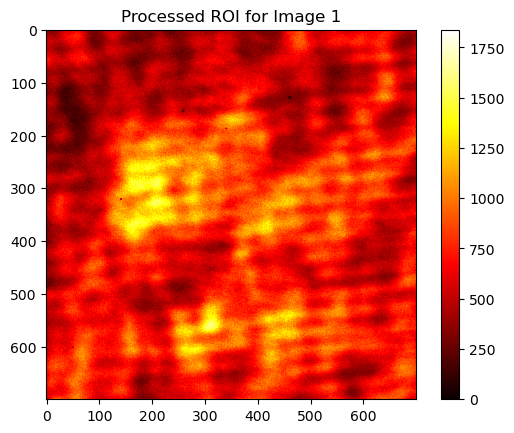

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the CSV files
image_dir = r'C:\Users\91897\Desktop\CP302\Speckle Images\C_4\Set2\Corner'

# Number of files
num_files = 90

# Array to store the image data
image_matrices = []

# Loop through each CSV file
for i in range(1, num_files + 1):
    file_name = f'T{i}_0008.ascii.csv'
    file_path = os.path.join(image_dir, file_name)
    
    # Check if file exists
    if os.path.exists(file_path):
        # Load the CSV data using pandas
        df = pd.read_csv(file_path, header=None)  # Assume no header in the CSV files
        data = df.to_numpy()  # Convert the DataFrame to a NumPy array
        image_matrices.append(data)
    else:
        print(f'File not found: {file_name}')

# Convert to NumPy array for further processing
A = np.stack(image_matrices, axis=2)

# Plot a particular frame (first image as an example)
plt.figure()
plt.imshow(A[:, :, 0], cmap='hot')
plt.colorbar()
plt.title('Image 1')

# Select and process a region of interest (ROI)
B = A[400:1100, 600:1300, :]
plt.figure()
plt.imshow(B[:, :, 0], cmap='hot')
plt.colorbar()
plt.title('Processed ROI for Image 1')

plt.show()


In [7]:
mean_intensity_values = []

# Loop through the image data for mean intensity calculation
for i in range(num_files):
    # Select a 10x10 ROI (adjust the region as needed)
    roi = A[:10, :10, i]
    mean_intensity = np.mean(roi)
    mean_intensity_values.append([f'T{i+1}_0008.ascii.csv', mean_intensity])

# Save mean intensity values to a CSV file
mean_intensity_df = pd.DataFrame(mean_intensity_values, columns=['File', 'Mean Intensity'])
output_file = os.path.join(image_dir, 'mean_intensity_values.csv')
mean_intensity_df.to_csv(output_file, index=False)


print(f'Mean intensity values saved to {output_file}')


Mean intensity values saved to C:\Users\91897\Desktop\CP302\Speckle Images\C_4\Set2\Corner\mean_intensity_values.csv


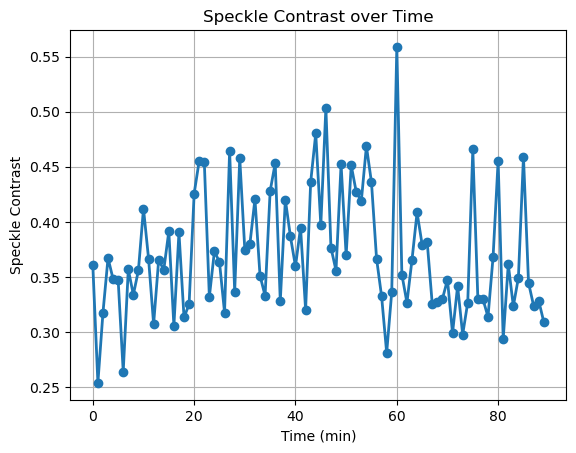

Speckle contrast values saved to C:\Users\91897\Desktop\CP302\Speckle Images\C_4\Set2\Corner\speckle_contrast_values.csv


In [8]:
speckle_contrast = []

# Loop through each image for speckle contrast calculation
for i in range(num_files):
    roi = B[:, :, i]
    std_dev = np.std(roi)
    mean_intensity = np.mean(roi)
    contrast = std_dev / mean_intensity
    speckle_contrast.append(contrast)

# Plot Speckle Contrast
time = np.arange(num_files)
plt.figure()
plt.plot(time, speckle_contrast, '-o', linewidth=2)
plt.title('Speckle Contrast over Time')
plt.xlabel('Time (min)')
plt.ylabel('Speckle Contrast')
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(image_dir, 'speckle_contrast_plot.png'))
plt.show()

# Save speckle contrast data
speckle_df = pd.DataFrame({'Time': time, 'Speckle Contrast': speckle_contrast})
speckle_output_file = os.path.join(image_dir, 'speckle_contrast_values.csv')
speckle_df.to_csv(speckle_output_file, index=False)

print(f'Speckle contrast values saved to {speckle_output_file}')
